In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
from decimal import Decimal

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

def format_plt(n):
    a = '%e' % Decimal(n)
    return r'${'+a.split('e')[0].rstrip('0').rstrip('.')+'}}$'+r'${*10^{'+a.split('e')[1]+'}}$'

def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

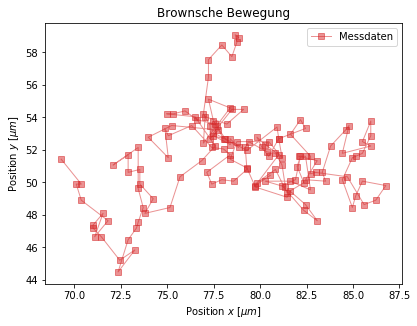

In [2]:
#Aufgabe 1

#Messwerte aus Datei 2: x, y über t
t, x, y = np.loadtxt('data\Messung2.dat', skiprows=1, usecols=(1, 2, 3), converters= {1: comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)


#Plot
fig, ax = plt.subplots(1, figsize=[6.4, 4.8])
plt.plot(x, y, lw=1, color='C3', marker='s', alpha=.50, label='Messdaten')
plt.title('Brownsche Bewegung')
plt.xlabel('Position '+r'${x}$'+' '+r'${[{\mu}m]}$')
plt.ylabel('Position '+r'${y}$' + ' '+r'${[{\mu}m]}$')
plt.legend(loc='best')

fig.savefig('figures/223_Fig1.pdf', format='pdf', bbox_inches='tight')


Anzahl der Messungen =  292
r_squared_mean [{\mu m}^2] =  1.574166e+00  +-  1.087616e-01
dt_mean [s] =  1.000473e+00


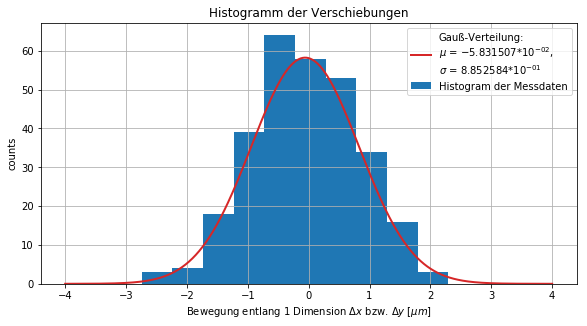

In [3]:
#Aufgabe 2 und 3
a = 8 * (20/222)
a_std = 2 * (20/222)
T = 22.6 + 273.15 
T_std = 0.7
eta = 9.4e-4
eta_std = 0.2e-4

dt = np.array([])
dx = np.array([])
dy = np.array([])
i = 0
while i < t.size-1:
    dt = np.append(dt,t[i+1]-t[i])
    dx = np.append(dx,x[i+1]-x[i])
    dy = np.append(dy,y[i+1]-y[i])
    i = i+1
r_squared = dx**2+dy**2

r_squared_mean = np.mean(r_squared)
r_squared_mean_std = np.std(r_squared)/np.sqrt(r_squared.size)
dt_mean = np.mean(dt)
dt_mean_std = np.std(dt)/np.sqrt(dt.size)

all_data = np.append(dx,dy)

counts = all_data.size
mu = np.mean(all_data)
sigma = np.std(all_data)

#Plot-Umgebung
x_fit = np.linspace(-4,4, 1000)
binwidth = sigma/2
x_bin = np.linspace((min(all_data))-binwidth/2, max(all_data)+binwidth/2, int((max(all_data)-min(all_data))/binwidth+1))
gauss = norm.pdf(x_fit, mu ,sigma)*counts*binwidth

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 *1.5, 4.8])
plt.title('Histogramm der Verschiebungen')
plt.xlabel('Bewegung entlang 1 Dimension '+r'${{\Delta}x}$'+' bzw. '+r'${{\Delta}y}$'+' '+r'${[{\mu}m]}$')
plt.ylabel('counts')
plt.hist(all_data, bins=x_bin, color='C0', label='Histogram der Messdaten')
plt.plot(x_fit, gauss, 'C3-', lw=2, label='Gauß-Verteilung:\n'+r'${\mu}$'+' = '+str(format_plt(mu))+',\n'+r'${\sigma}$'+' = '+str(format_plt(sigma)))
plt.grid(True)
plt.legend(loc='best')

fig.savefig('figures/223_Fig2.pdf', format='pdf', bbox_inches='tight')

#Ausgabe
print('Anzahl der Messungen = ', counts)
print('r_squared_mean [{\mu m}^2] = ', format_e(r_squared_mean), ' +- ', format_e(r_squared_mean_std))
print('dt_mean [s] = ', format_e(dt_mean))

Steigung:
S [{\mu m}^2 / s] = 1.559976e+00  +-  3.188454e-05


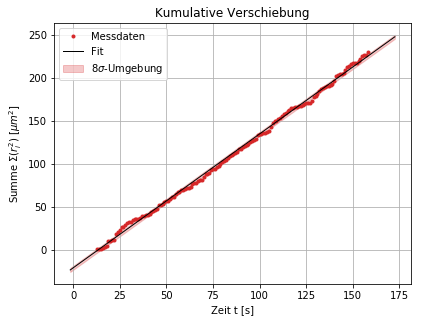

In [4]:
#Aufgabe 4

counts = r_squared.size

r_kumm = np.cumsum(r_squared)

x = t[:-1]
y = r_kumm

#Fitfunktion
from scipy.optimize import curve_fit

def fit_func(x,a,b):
    return a*x+b

popt, pcov = curve_fit(fit_func, x, y)

#Sigma-Umgebung
nstd = 8 # um n-Sigma-Umgebung im Diagramm zu zeichnen
popt_top = popt+nstd*np.diag(pcov)
popt_bot = popt-nstd*np.diag(pcov)
#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(x_fit, *popt)
fit_top = fit_func(x_fit, *popt_top)
fit_bot = fit_func(x_fit, *popt_bot)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4, 4.8])
plt.title('Kumulative Verschiebung')
plt.grid(True)
plt.plot(t[:-1], r_kumm, color='C3', marker='.', linewidth=0, label='Messdaten')
plt.plot(x_fit, fit, 'k', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.xlabel('Zeit t [s]')
plt.ylabel('Summe $\Sigma (r_i^2)$ [${\mu m}^2$]')
plt.legend(loc='best')

fig.savefig('figures/223_Fig3.pdf', format='pdf', bbox_inches='tight')

#Auswertung
s = popt[0]
s_std = pcov[0][0]

#Ausgabe
print('Steigung:')
print('S [{\mu m}^2 / s] =', format_e(s), ' +- ', format_e(s_std))

In [6]:
k_1 = 6*r_squared_mean*np.pi*a/(4*T*dt_mean) * 1e-18 * eta
k_1_std = k_1*np.sqrt((r_squared_mean_std/r_squared_mean)**2+(a_std/a)**2+(T_std/T)**2+(dt_mean_std/dt_mean)**2+(eta_std/eta)**2)
k_2 = 6*s*np.pi*a/(4*T) * 1e-18 * 9.4e-4
k_2_std = k_2*np.sqrt((s_std/s)**2+(a_std/a)**2+(T_std/T)**2+(eta_std/eta)**2)

print('k_1 [J/K]: '+format_e(k_1)+' +- '+format_e(k_1_std))
print('k_2 [J/K]: '+format_e(k_2)+' +- '+format_e(k_2_std))

k_1 [J/K]: 1.698465e-23 +- 4.420316e-24
k_2 [J/K]: 1.68395e-23 +- 4.225282e-24
